Gabriel Almeida Pimentel
202010403

1. Instalar e importar a biblioteca dlib, além de todas as outras bibliotecas necessárias

In [1]:
# Importando as nossa dependências comuns (openCV, NumPy, Cv2 para exibir as imagens, etc):
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Importando a dlib:
import dlib


2. Carregar o detector de faces da dlib;

3. Fazer o upload do modelo de marcações faciais (Escolhi o modelo de 5 landmarks)

4. Carregar uma imagem contendo uma ou mais faces aproximadamente em posição frontal do rosto;


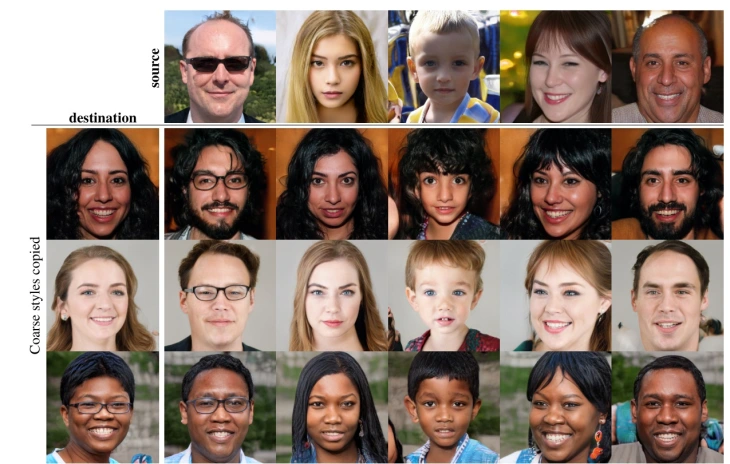

In [2]:
#Carregando a imagem escolhida;
imagem = cv2.imread('Faces.png')
cv2_imshow(imagem)

5. Chamar o detector de faces da dlib, detectar todas as faces da imagem escolhida, encontrando o retângulo envolvente ao redor de cada face. 


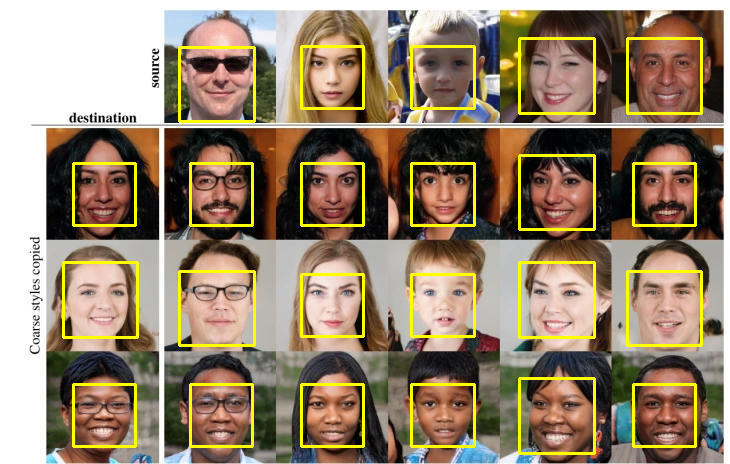

In [8]:
#Dectando as faces das pessoas e desenhando os retangulos
detector_face = dlib.get_frontal_face_detector()

imagem = cv2.imread('Faces.png')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l,t), (r, b), (0,255,255), 2)


cv2_imshow(imagem)

6. A partir dos retângulos envolventes das faces encontradas, chamar o detector de marcos faciais de cada face, e desenhar um círculo VERMELHO em cima de cada marco facial;


In [9]:
# Carrega o detector de marcos faciais da dlib:
detector_pontos = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

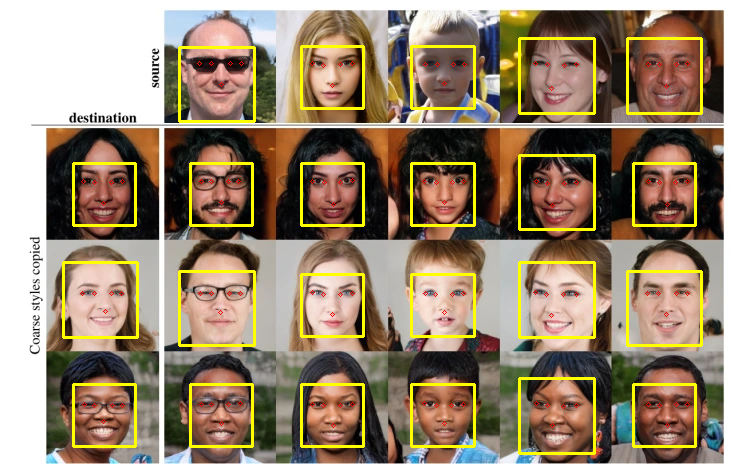

In [10]:
#Trazendo a imagem
imagem2 = cv2.imread('Faces.png')

# Detectando os retângulos encontrados na imagem e armazenamos no vetor "deteccoes":
deteccoes = detector_face(imagem2, 1)
for face in deteccoes:
  # Para cada detecção, encontramos os marcos faciais e armazenamos no vetor "pontos":
  pontos = detector_pontos(imagem2, face)
  # Desenhando cada marco facial de cada face encontrada na imagem.
  for ponto in pontos.parts():
    cv2.circle(imagem2, (ponto.x, ponto.y), 2, (0,0,255), 1)

  # Desenhando os retângulos e as cores. 
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem2, (l,t), (r, b), (0,255,255), 2)


cv2_imshow(imagem2)




7. Depois de encontrar os marcos faciais, desenhar um círculo centrado no ponto médio da face, lembrando que esse ponto possui coordenadas x e y dadas por: x=(l+r)/2  e y=(t+b)/2. O raio do círculo deve ser (r-l)/2.


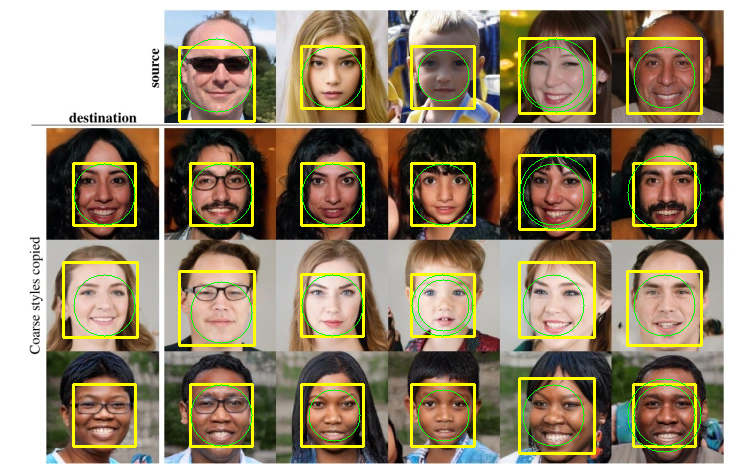

In [12]:
#Circulando a partir do ponto médio da face das pessoas;
detector_face = dlib.get_frontal_face_detector()

deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()

  cv2.circle(imagem, ((l+r)//2, (t+b)//2), (r-l)//2, (0,255,0))


cv2_imshow(imagem)